In [1]:
import os
import copy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
import scipy 

import seaborn as sns
from IPython.display import Markdown as md

In [6]:
os.chdir('/Users/chenxizhou/Dropbox/code_package/IFlogdensity')
true_data = np.load('data/geyser.npy').astype(np.float64)
df = copy.deepcopy(true_data[:, 0]).reshape(-1, 1)

# original data with 108.0 removed 
data_waiting = df[df != 108.0]

contam_data_list = [20., 120., 150., 200.]
grid_point = np.arange(1., 311.)
bw = 5.
kernel_type = 'gaussian_poly2'
contam_weight = 1e-3
plot_domain = (1., 310.)
plot_pts_cnt = 3000

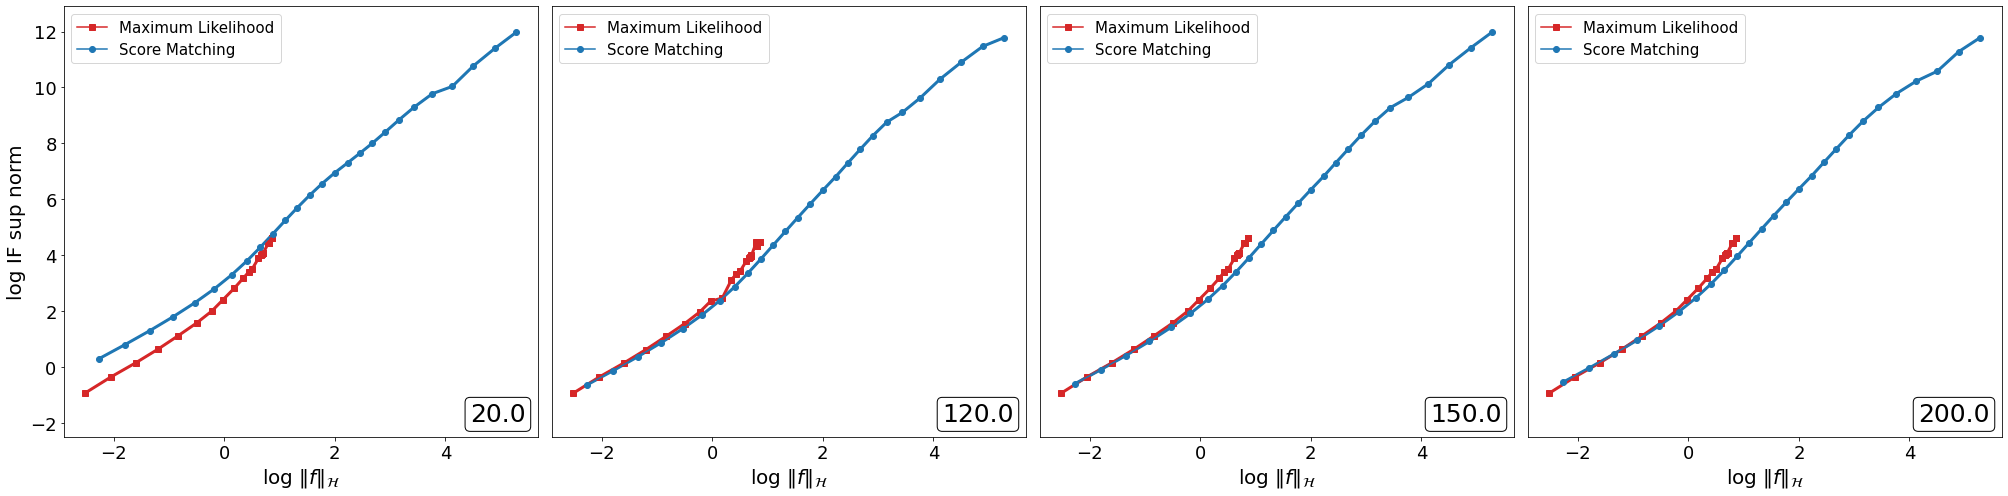

In [7]:
fig = plt.figure(constrained_layout=False)
fig.set_figheight(7)
fig.set_figwidth(28)
ncols = 4
nrows = 1

label_fontsize = 20
info_fontsize = 25
tick_fontsize = 18
legend_fontsize = 15
linewidth = 3.0
x_label = r'log $\Vert f \Vert_{\mathcal{H}}$'
y_label = 'log IF sup norm'

spec = gridspec.GridSpec(ncols=ncols, nrows=nrows, figure=fig)

for i in range(nrows): 
    for j in range(ncols): 
        
        ax = fig.add_subplot(spec[i, j])
        contam_data = contam_data_list[j]
        
        summary_df_ml = pd.read_excel(f'data/bw={bw}-kernel={kernel_type}-contamweight={contam_weight}-summary.xlsx', 
                                      f'ML-{int(contam_data)}')
        
        summary_df_sm = pd.read_excel(f'data/bw={bw}-kernel={kernel_type}-contamweight={contam_weight}-summary.xlsx', 
                                      f'SM-fin-{int(contam_data)}')
        
        summary_df_sm = summary_df_sm[summary_df_sm.norm_f_without >= 0.07]
        
        ax.plot(np.log(summary_df_ml.norm_f_without), np.log(summary_df_ml.IF_supnorm), 
                color = 'tab:red', linestyle = 'solid', linewidth = linewidth)
        
        ax.plot(np.log(summary_df_sm.norm_f_without), np.log(summary_df_sm.IF_supnorm), 
                color = 'tab:blue', linestyle = 'solid', linewidth = linewidth)
        
        
        plt.plot(np.log(summary_df_ml.norm_f_without), np.log(summary_df_ml.IF_supnorm), 
                 color = 'tab:red', marker = 's', label = 'Maximum Likelihood')
        plt.plot(np.log(summary_df_sm.norm_f_without), np.log(summary_df_sm.IF_supnorm), 
                 color = 'tab:blue', marker = 'o', label = 'Score Matching')

        plt.legend(loc = 'upper left', fontsize = legend_fontsize)
        plt.ylim((-2.5, 12.9))
        
        if i == nrows - 1: 
            ax.set_xlabel(x_label, fontsize = label_fontsize)
        else: 
            ax.set_xticks([])
        if j == 0: 
            ax.set_ylabel(y_label, fontsize = label_fontsize)
        else: 
            ax.set_yticks([])
        
        ax.tick_params(axis = 'both', labelsize = tick_fontsize)

        info = r"{add_obs}".format(add_obs = contam_data)
        ax.text(0.975, 0.08,
                info,
                fontsize = info_fontsize,
                multialignment = 'left',
                horizontalalignment = 'right',
                verticalalignment = 'top',
                transform = ax.transAxes,
                bbox = {'facecolor': 'none',
                        'boxstyle': 'Round, pad=0.2'})

plt.tight_layout()
plt.savefig(f'plots/PenSMFin-PenML-geyser-waiting-logdensity-IF-supnorm-natparamnorm-bw={bw}.pdf')